In [2]:
# Imports
from project4 import reproduce_milky_way, sky_map_view, plt2rgbarr,kmeans_rgb_clusters, categorize_pixels_brightness, categorize_pixels_color,overlay_clusters_on_image,categorize_pixels_greyness,plot_ebola_cases,linear_regression_ebola, polynomial_regression_ebola, load_and_combine_ebola_data, ebola_outbreaks_lstm, plot_ebola_predictions, ebola_outbreaks_dense

# Assignment 4

# Topic 1: Unsupervised Learning: Clastering the Milkway way

## Task 0
We have created a python virtual enviroment with the mc_plot package installed and other packages needed for the rest of the assignment.  We also saved the packages in requirements.txt file. So that anyone can create the same enviroment by running the following command in the terminal:
```
pip install -r requirements.txt
```


## Task 1
In this task we reproduce the image of the Milky way using MWSkyMap.

In [ ]:
from astropy import units as u
# we use centre as galactic center=(266.41683 deg, -29.00781 deg)
reproduce_milky_way(centre=(266.41683 * u.deg, -29.00781 * u.deg))

c:\Users\mmasc\OneDrive - Universitetet i Stavanger\MOD300\second have\project solution\.venv\Lib\site-packages\mw_plot\matplotlib_backend.py:380: UserWarning: Projections other than equirectangular does not support custom center and radius, using default center=(0, 0) degree and radius=(180, 90) degree
  warnings.warn(


The image in the assignment was generated using MWFaceOn, whereas the figure above was produced with MWSkyMap, as required in Task 0. For the figure shown, we used galactic coordinates as the center. We also discovered that the plotting only worked for us when we provided the numerical coordinate values for the centers, rather than using object names like "M31".

## Task 2
Here we plot the Milky Way using different centers and radius.

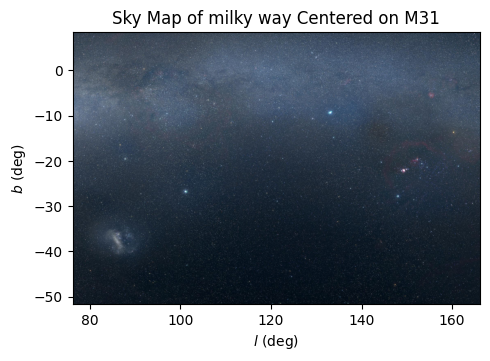

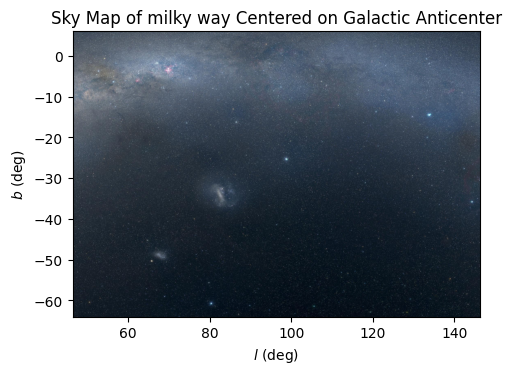

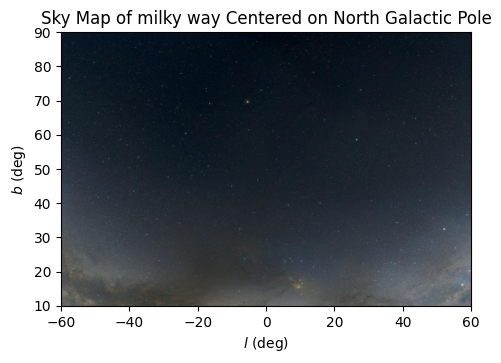

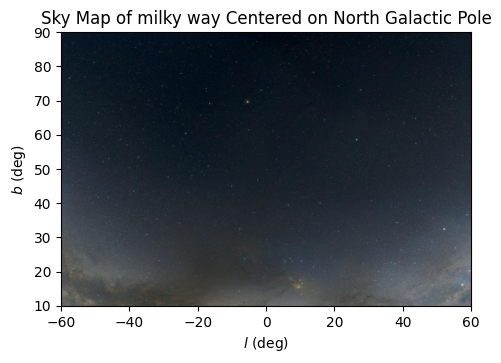

In [ ]:
from astropy import units as u

# centre=M31, radius=(45 deg, 30 deg)
fig1 = sky_map_view(centre=(121.17 * u.deg, -21.57 * u.deg), radius=(45 * u.deg, 30 * u.deg), figure_title="Sky Map of milky way Centered on M31")



# # centre=Galactic Anticenter, radius=(50,35) deg
sky_map_view(centre=(96.33728337 * u.deg, -29.00781144 * u.deg), radius=(50 * u.deg, 35 * u.deg), figure_title="Sky Map of milky way Centered on Galactic Anticenter")

# # centre= North Galactic Pole, radius=(60,40) deg
sky_map_view(centre=(0 * u.deg, 50 * u.deg), radius=(60 * u.deg, 40 * u.deg), figure_title="Sky Map of milky way Centered on North Galactic Pole")


The figures show the Milky Way centered on different points in the sky with specified radius. Each plot provides a different perspective of the Milky Way. 

## Task 3

Here we generate rgb array figure1 using plt2rgbarr.

In [ ]:
rgblist = plt2rgbarr(fig1)
print(rgblist.shape)

(500, 500, 3)


We now have the rgb array of the sky map figure stored in figure1 variable. The shape of the array is (500, 500, 3), which corresponds to the height, width, and color channels (RGB) of the image. Each pixel in the array contains three values representing the intensity of red, green, and blue colors, respectively. We will use this rgb array in the next task to perform clustering.

## Task 4
In this task we categorize the pixels of the figure. Instead of each pixel having three values (R,G,B), we want to categorize them into categories. In this partical task we generate two categories: brightness and color.

###  Brightness categorization
For each pixel we compute the sum of its R, G, and B values (range 0–765). If the sum is between 0 and 199, the pixel is labeled “dark”, between 200 and 399 it is labeled “medium”, and between 400 and 765 it is labeled “bright”

###  Color categorization
For each pixel we check which of the R, G, or B values is the highest. If R is the highest, the pixel is labeled “red”, if G is the highest, it is labeled “green”, and if B is the highest, it is labeled “blue”. In case of a tie, we use the following priority order: red > green > blue. For example, if a pixel has R=100, G=150, and B=150, it is labeled “green” because green has a higher priority than blue.

In [ ]:

# categrories for brightness
categories1 = {
    "dark": {
        "range": (0, 199),
    },
    "medium": {
        "range": (200, 399),
    },
    "bright": {
        "range": (400, 765),
    },
}

category_map1 = categorize_pixels_brightness(rgblist, categories1)
print(category_map1)

# categrories for color
category_map2= categorize_pixels_color(rgblist)
print(category_map2)



c:\Users\mmasc\OneDrive - Universitetet i Stavanger\MOD300\second have\project solution\project4\project4.py:145: RuntimeWarning: overflow encountered in scalar add
  pixel_sum = r + g + b


[['medium' 'medium' 'medium' ... 'medium' 'medium' 'medium']
 ['medium' 'medium' 'medium' ... 'medium' 'medium' 'medium']
 ['medium' 'medium' 'medium' ... 'medium' 'medium' 'medium']
 ...
 ['medium' 'medium' 'medium' ... 'medium' 'medium' 'medium']
 ['medium' 'medium' 'medium' ... 'medium' 'medium' 'medium']
 ['medium' 'medium' 'medium' ... 'medium' 'medium' 'medium']]
[['grey' 'grey' 'grey' ... 'grey' 'grey' 'grey']
 ['grey' 'grey' 'grey' ... 'grey' 'grey' 'grey']
 ['grey' 'grey' 'grey' ... 'grey' 'grey' 'grey']
 ...
 ['grey' 'grey' 'grey' ... 'grey' 'grey' 'grey']
 ['grey' 'grey' 'grey' ... 'grey' 'grey' 'grey']
 ['grey' 'grey' 'grey' ... 'grey' 'grey' 'grey']]


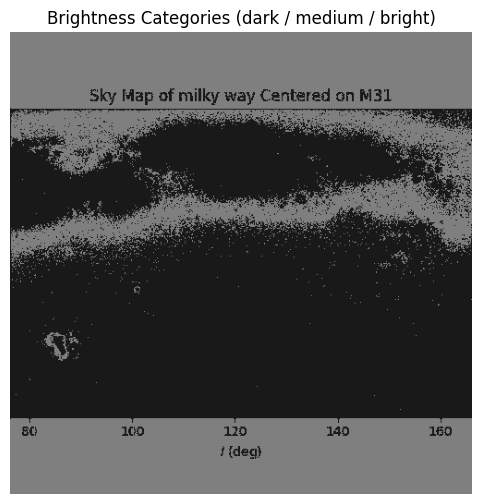

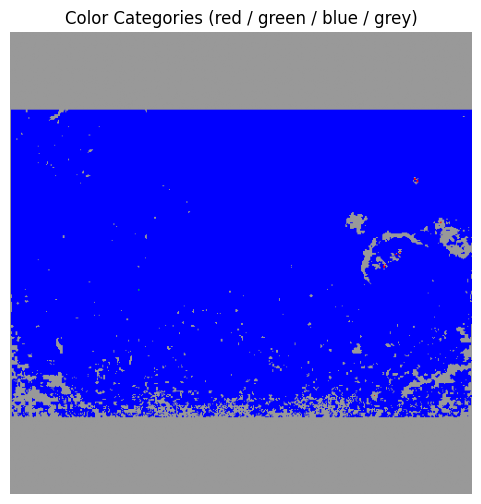

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a color map for the brightness categories
brightness_colors = {
    "dark":   [0.1, 0.1, 0.1],  
    "medium": [0.5, 0.5, 0.5],  
    "bright": [0.9, 0.9, 0.9], 
}

# Convert category map to RGB values
H, W = category_map1.shape
brightness_img = np.zeros((H, W, 3))

for i in range(H):
    for j in range(W):
        brightness_img[i, j] = brightness_colors[category_map1[i, j]]

# Plot
plt.figure(figsize=(6, 6))
plt.imshow(brightness_img)
plt.title("Brightness Categories (dark / medium / bright)")
plt.axis("off")
plt.show()


# Create a color map for the color categories

color_map = {
    "red":   [1.0, 0.0, 0.0],
    "green": [0.0, 1.0, 0.0],
    "blue":  [0.0, 0.0, 1.0],
    "grey":  [0.6, 0.6, 0.6],
}

H, W = category_map2.shape
color_img = np.zeros((H, W, 3))

for i in range(H):
    for j in range(W):
        color_img[i, j] = color_map[category_map2[i, j]]

plt.figure(figsize=(6, 6))
plt.imshow(color_img)
plt.title("Color Categories (red / green / blue / grey)")
plt.axis("off")
plt.show()


We now have categorized the pixels of the Milky way sky map into brightness and color categories. We see from the results that most of the pixels are categorized as dark and blue, which is expected since the Milky Way is a faint and distant object in the night sky.

## Task 5
 <!-- Use K-NN (Nearest neighbor, not discussed in class but extremely simple) or K-means to 
cluster the data -->


In this task we use K-means clustering algorithm to cluster the pixels of the Milky way sky map based on their RGB values. We choose K=3 meaning we want to group the pixels into 3 clusters based on their color similarity.

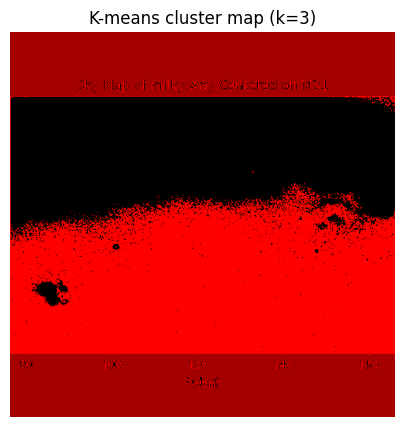

In [ ]:
from matplotlib import pyplot as plt
k = 3
kmeans_rgb, label_img_rgb = kmeans_rgb_clusters(rgblist, k=k)

plt.figure(figsize=(5, 5))
plt.imshow(label_img_rgb, cmap="flag")
plt.title(f"K-means cluster map (k={k})")
plt.axis("off")
plt.show()


Above figure shows the clustered image of the Milky way sky map using K-means clustering algorithm with K=3. We see red and black dominate the clusters, which is expected since the Milky Way has a lot of dark regions and some bright regions with reddish colors due to the presence of stars and dust.

## Task 6
In this task we overlay the clustering results on the original image to visualize how the clusters correspond to different regions of the Milky Way.

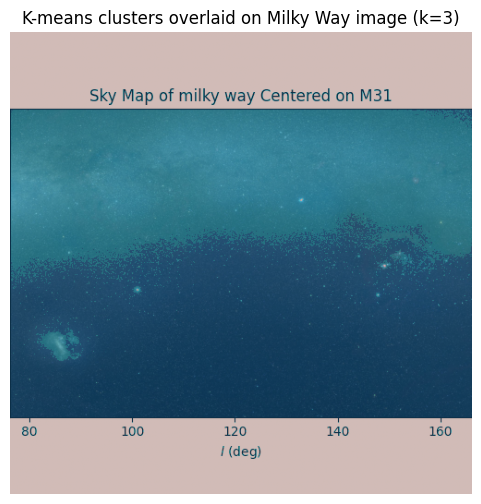

In [ ]:
overlay_clusters_on_image(
    rgb_img=rgblist,
    label_img=label_img_rgb,
    alpha=0.4,
    title=f"K-means clusters overlaid on Milky Way image (k={k})"
)



## Task 7
In this task we experiment with new encodings of the pixel values and repeat the clustering procedure. The goal is to see how changing the way we categorize pixels (e.g., by greyness instead of raw RGB) affects the resulting clusters and what structure of the Milky Way becomes more or less visible.


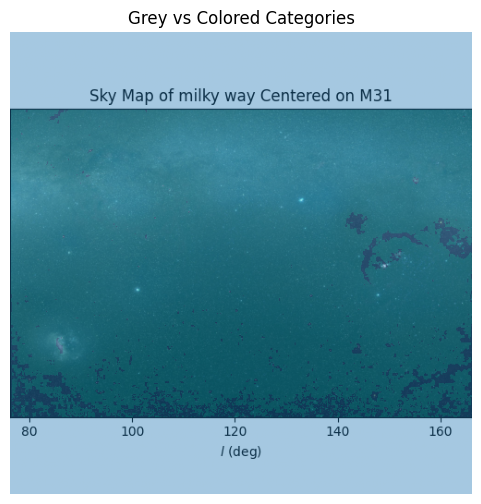

In [ ]:
category_map3 = categorize_pixels_greyness(rgblist)

mapping = {"grey": 0, "colored": 1}
label_img7 = np.vectorize(mapping.get)(category_map3)


overlay_clusters_on_image(
    rgb_img=rgblist,
    label_img=label_img7,
    alpha=0.4,
    title="Grey vs Colored Categories"
)



We created a new set of categories based on greyness, separating pixels into grey (low color variation) and colored (high color variation). We then repeated Tasks 5 and 6 by converting these categories into numerical labels and overlaying the resulting clusters onto the Milky Way image.

This new encoding gave a different segmentation compared to RGB-based clustering: grey pixels highlighted the background and faint diffuse regions, while colored pixels captured bright stars and high-contrast structures. Unlike brightness or raw RGB clustering, this method emphasizes saturation rather than intensity.

From these experiments, we learn that unsupervised models do not identify physical galactic structures on their own—they only group pixels with similar numerical properties. However, by trying different encodings, we can reveal different aspects of the galaxy. This shows that unsupervised learning is useful for exploring patterns, but meaningful interpretation still requires domain knowledge.

# Topic 2: Supervised learning: Machines versus human models, who can save the world??

## Task 0
In this task we visualize real data from the **World Health Organization (WHO)**, which includes the number of new and cumulative Ebola cases in **Guinea**, **Liberia**, and **Sierra Leone**. 

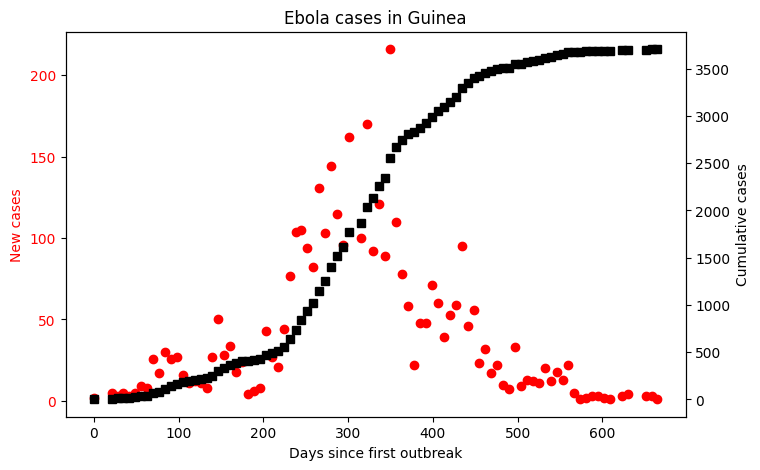

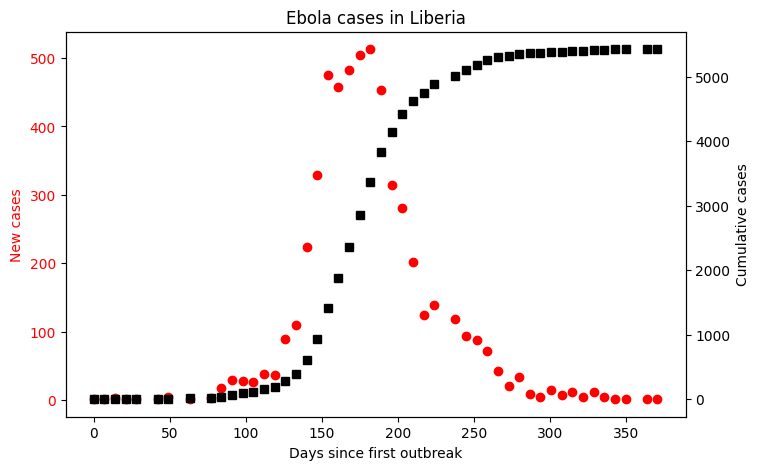

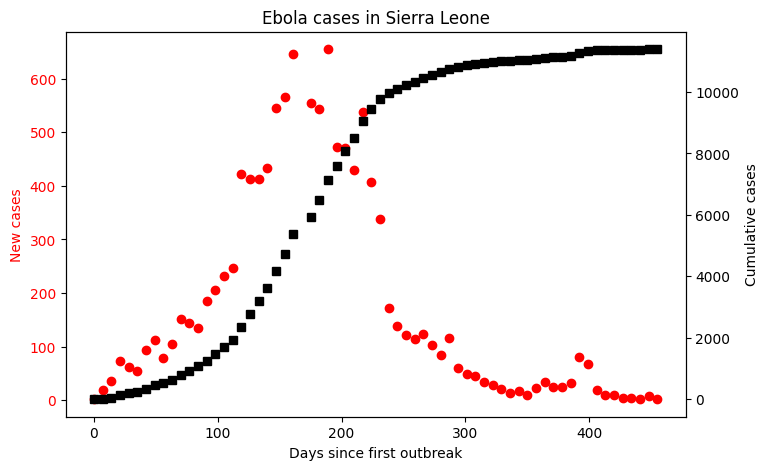

In [ ]:
plot_ebola_cases("./data/ebola_cases_guinea.dat", "Guinea")
plot_ebola_cases("./data/ebola_cases_liberia.dat", "Liberia")
plot_ebola_cases("./data/ebola_cases_sierra_leone.dat", "Sierra Leone")

## Task 1
In this task we train a supervised learning model to predict the number of new Ebola cases based on the cumulative number of cases. We use a simple linear regression model for this purpose. 

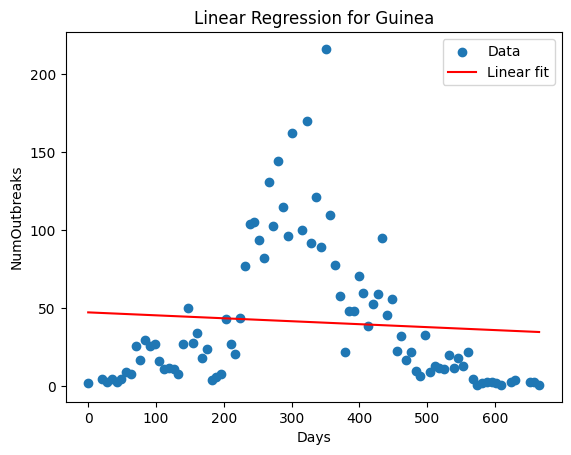

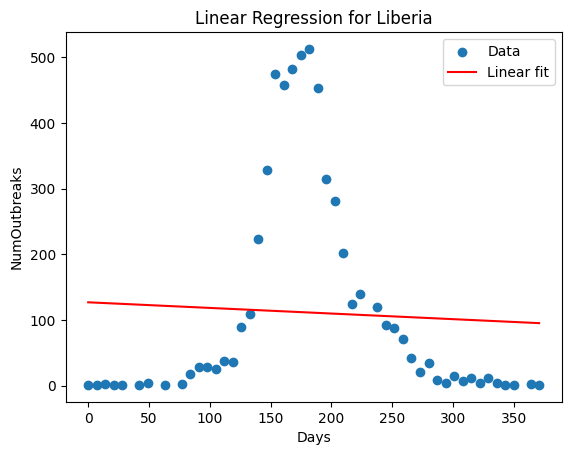

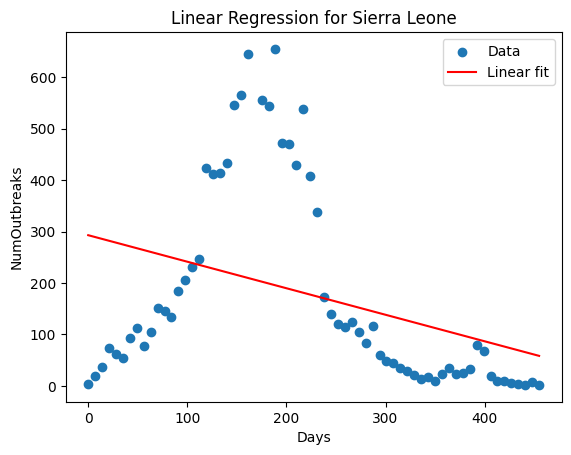

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
linear_regression_ebola("./data/ebola_cases_guinea.dat", "Guinea")
linear_regression_ebola("./data/ebola_cases_liberia.dat", "Liberia")
linear_regression_ebola("./data/ebola_cases_sierra_leone.dat", "Sierra Leone")

Even by just looking at the plot, we can see that the data points do not follow a straight line pattern. Therefore, a linear regression model may not be the best fit for this data.

## Task 2
Here we apply polynomial regression to the same data to see if it improves the model's performance compared to linear regression. 

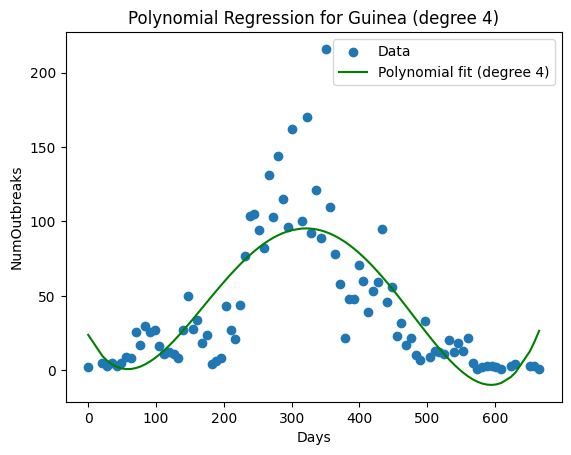

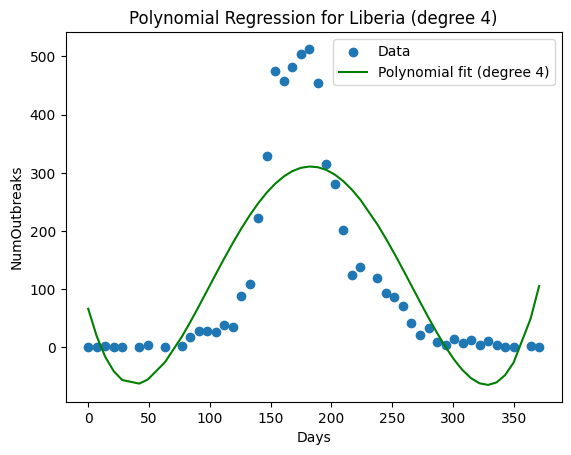

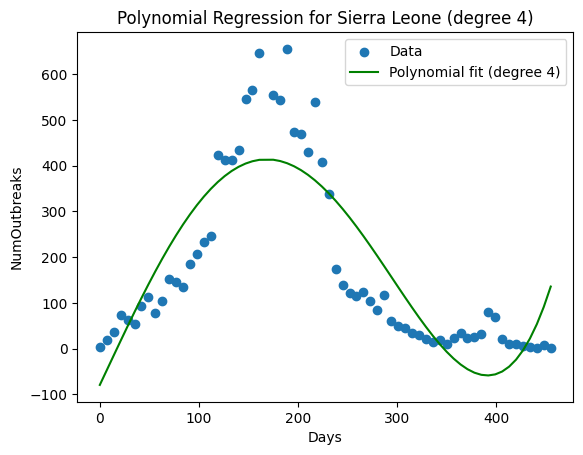

(LinearRegression(), PolynomialFeatures(degree=4))

In [ ]:
polynomial_regression_ebola("./data/ebola_cases_guinea.dat", "Guinea", degree=4)
polynomial_regression_ebola("./data/ebola_cases_liberia.dat", "Liberia", degree=4)
polynomial_regression_ebola("./data/ebola_cases_sierra_leone.dat", "Sierra Leone", degree=4)

After some experimentation, we found that a polynomial degree of 4 provides a good balance between model complexity and performance. Higher degrees tended to overfit the data, while lower degrees did not capture the underlying trends as effectively. As seen on the figures above, the polynomial regression model fits the data much better than the linear regression model, capturing the non-linear trends in the Ebola outbreak data more effectively.

## Task 3
In this task we implement a simple neural network to predict the number of Ebola cases. Since this a time-series data, the samples are kept in chronological order without shuffling. We use 80% of the data for training and 20% for testing. Also we created a function that combines all the data from all the countries into a single dataset.

To make it simpler,we scale the input and output with Min-max normlizarion, and the network consists of an input layer, two hidden layers with ReLU activation, and one linear output layer. The model learns only a smooth trend over time and cannot capture the sharp spikes present in the real outbreak data, which shows the limitation of using a simple dense network for epidemic forecasting.

c:\Users\mmasc\OneDrive - Universitetet i Stavanger\MOD300\second have\project solution\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.1433 - mae: 0.2380 - val_loss: 0.0318 - val_mae: 0.1746
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1258 - mae: 0.2311 - val_loss: 0.0587 - val_mae: 0.2389
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1158 - mae: 0.2334 - val_loss: 0.0856 - val_mae: 0.2895
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1095 - mae: 0.2400 - val_loss: 0.1087 - val_mae: 0.3268
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1058 - mae: 0.2453 - val_loss: 0.1261 - val_mae: 0.3523
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1037 - mae: 0.2482 - val_loss: 0.1371 - val_mae: 0.3675
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1024 - mae: 0.2504 - val_loss: 0.1425 - val_mae: 0.3748
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1017 - mae: 0.2516 - val_loss: 0.1437 - val_mae: 0.3764
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1013 - mae: 

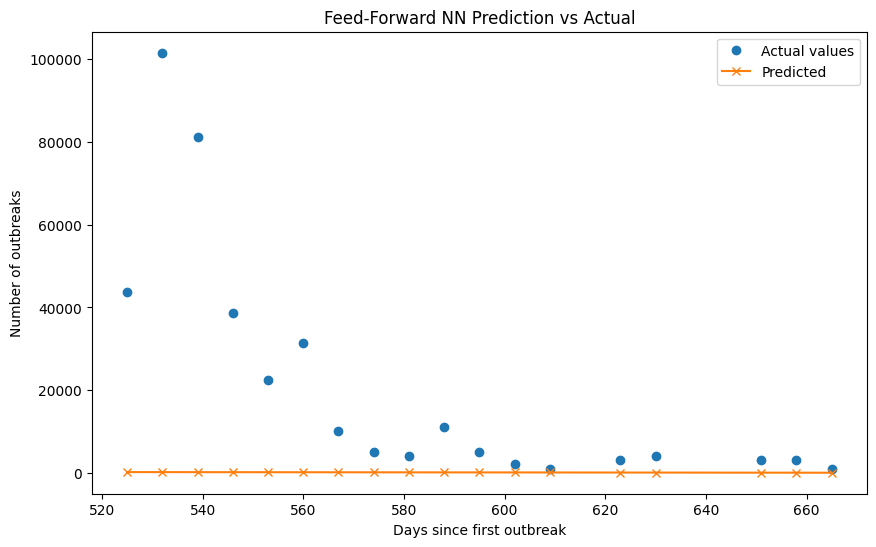

In [ ]:
X, y, df_combined = load_and_combine_ebola_data()

#  feed-forward NN
(model3,
 X_train_raw3, y_train_raw3,
 X_test_raw3,  y_test_raw3,
 X_train3,     y_train3,
 X_test3,      y_test3,
 x_scaler3,    y_scaler3,
 history3) = ebola_outbreaks_dense(X, y, train_split=0.8, epochs=100, batch_size=16)

# plotting
plot_ebola_predictions(model3, X_test3, y_test_raw3, X_test_raw3, y_scaler3,
                       title="Feed-Forward NN Prediction vs Actual")


We see that the neural network captures the overall trend of the Ebola outbreak but fails to predict the sharp spikes in the actual data. This limitation arises because the simple feed-forward architecture does not account for temporal dependencies inherent in time-series data.

## Task 4
In Task 4 we train an LSTM (Long Short-Term Memory) network to predict the total number of Ebola outbreaks using past outbreak values. The data from Guinea, Liberia and Sierra Leone are first combined by calendar date and summed, producing a single time series of total weekly outbreaks. We then construct sliding windows of length W=5, where each training example consists of the previous 5 observations used to predict the next one. The LSTM takes these sequences as input and is trained on the first 80% of the time series, while the remaining 20% is used as a test set, preserving the chronological order. 

The input–output relationship for the model can be written as:
$$ 
[y(t−5), y(t−4), y(t−3), y(t−2), y(t−1)] → y(t)
$$

In other words, we feed the outbreak numbers from the past five reporting periods to predict the next week’s outbreak count. Now this is supervised learning where we expect the model predict y(t) given the previous values.


Epoch 1/50


c:\Users\mmasc\OneDrive - Universitetet i Stavanger\MOD300\second have\project solution\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.1747 - mae: 0.2735 - val_loss: 8.1033e-04 - val_mae: 0.0245
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1378 - mae: 0.2352 - val_loss: 0.0019 - val_mae: 0.0421
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1074 - mae: 0.2085 - val_loss: 0.0042 - val_mae: 0.0615
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0827 - mae: 0.1868 - val_loss: 0.0076 - val_mae: 0.0840
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0608 - mae: 0.1724 - val_loss: 0.0117 - val_mae: 0.1059
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0440 - mae: 0.1608 - val_loss: 0.0157 - val_mae: 0.1233
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0329 - mae: 0.1501 - val_loss: 0.0182 - val_mae: 0.1329
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0270 - mae: 0.1404 - val_loss: 0.0176 - val_mae: 0.1306
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0237 - mae: 0.1301 - val_los

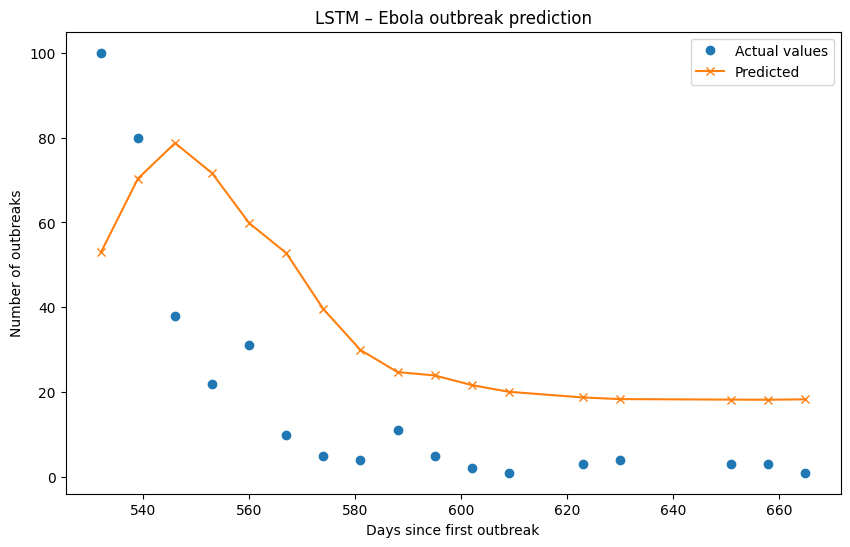

In [ ]:

X_days, y_outbreaks, df_combined = load_and_combine_ebola_data()

WINDOW_SIZE = 5
TRAIN_SPLIT = 0.8

#Train using our function
lstm_model, y_scaler4, X_train4, y_train4, X_test4, y_test4, history4 = (
    ebola_outbreaks_lstm(
        y_outbreaks=y_outbreaks,
        window_size=WINDOW_SIZE,
        train_split=TRAIN_SPLIT,
        epochs=50,
        batch_size=16
    )
)

#  Build 
days = X_days.reshape(-1)            
days_targets = days[WINDOW_SIZE:]     
num_seq_samples = len(days_targets)
split_idx = int(TRAIN_SPLIT * num_seq_samples)
days_test = days_targets[split_idx:]

# Plot
plot_ebola_predictions(
    model=lstm_model,
    X_test=X_test4,
    y_test_scaled=y_test4, 
    X_axis_raw=days_test,
    y_scaler=y_scaler4,
    title="LSTM – Ebola outbreak prediction"
)

This is much better than the simple dense network in Task 3, as the LSTM architecture is designed to capture temporal dependencies in sequential data. The LSTM model is able to learn from the patterns in the past outbreak data and make more accurate predictions, including some of the spikes in the actual outbreak numbers. This demonstrates the advantage of using recurrent neural networks like LSTM for time-series forecasting tasks such as epidemic prediction.

## Task 5
Based on our results, it is clear that machine learning models, especially sequence-based models like LSTMs can help identify general trends in epidemic data, but they cannot replace traditional epidemiological modeling. The dense neural network in Task 3 failed to capture the outbreak pattern, and although the LSTM in Task 4 performed better, it still produced overly smooth predictions and was unable to reproduce the large spikes and sudden drops present in the real outbreak curve. This illustrates a fundamental limitation that machine learning learns only from past data, while epidemic dynamics depend on other factors such as human behavior, enironmental conditions, and intervention measures, which may not be fully reflected in historical outbreak numbers.

In our case, the available data was limited and noisy, which further restricts what our model can learn. More data might improve performance, but even with larger datasets, ML models alone would still struggle to predict abrupt changes in transmission. Therefore, the best approach is a hybrid one, combining machine learning with mechanistic epidemiological models and domain expertise. A good prediction in this context is one that captures the overall trend and provides stable short-term forecasts, rather than perfectly matching every outbreak spike. Machine learning is a useful tool, but it must be integrated with expert knowledge to support reliable public health decision-making.

## What we learned

### Topic 1 (Abdulaziz) , 
I learned how to explore the Milky Way using unsupervised learning. By trying different ways of encoding the pixel colors (RGB, brightness, and grey vs colored), I saw how each method highlights different parts of the galaxy. I also learned that unsupervised models do not understand the physics of the galaxy—they only group pixels that look similar. This showed me how important the choice of features and encoding is.
### Topic 2 (Mascuud) 
I learned how to use supervised learning to model the Ebola outbreak. I worked with linear regression, polynomial regression, a neural network, and an LSTM. Each method produced different predictions, and I saw why data scaling and the train/test split matter. I really enjoyed learning about recurrent neural networks like LSTM for time-series data and how t works behind the scenes. Working on this assignment taught me that machine learning can help predict trends, but it must be used and interpreted carefully.


## Use of AI
This assignment was challenging, specially the supervised learning part with Ebola data. While doing the assigment, we used AI and youtube to better understand some concepts related to LSTM and time series forecasting. For the AI part, we used copilot to help us with some code snippets and debugging.

## References
- McPlot documentation: https://milkyway-plot.readthedocs.io/en/stable/
- Time Series Forecasting with the Long Short-Term Memory Network in Python: https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/
- Project 3 materials and lectures, code examples from MOD300 course.